In [53]:
import numpy as np
import pandas 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [92]:
balance_data = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/DecisionTreee.csv")

print(balance_data)

          parents hasNursery      Form Children     Housing         Social  \
0           usual     proper  complete        1  convenient        nonprob   
1           usual     proper  complete        1  convenient        nonprob   
2           usual     proper  complete        1  convenient        nonprob   
3           usual     proper  complete        1  convenient  slightly_prob   
4           usual     proper  complete        1  convenient  slightly_prob   
...           ...        ...       ...      ...         ...            ...   
12955  great_pret  very_crit    foster     more    critical  slightly_prob   
12956  great_pret  very_crit    foster     more    critical  slightly_prob   
12957  great_pret  very_crit    foster     more    critical    problematic   
12958  great_pret  very_crit    foster     more    critical    problematic   
12959  great_pret  very_crit    foster     more    critical    problematic   

            Health       Class     Finance  
0      recommended

In [84]:
d = {'usual': 0, 'pretentious': 1, 'great_pret': 2}
balance_data['parents'] = balance_data['parents'].map(d)

d1 = {'proper' : 0, 'less_proper':1, 'improper' : 2, 'critical' : 3, 'very_crit':4}
balance_data['hasNursery'] = balance_data['hasNursery'].map(d1)

d2 = {'complete' : 0, 'completed':1, 'incomplete' : 2, 'foster' : 3}
balance_data['Form'] = balance_data['Form'].map(d2)

d4=  {'convenient' : 0, 'less_conv':1, 'critical' : 2}
balance_data['Housing'] = balance_data['Housing'].map(d4)

d5= {'more' : 0, '1': 1, '2':2, '3':3}
balance_data['Children'] = balance_data['Children'].map(d5)

d6=  {'convenient' : 0, 'inconv':1}
balance_data['Finance'] = balance_data['Finance'].map(d6)

d7 = {'nonprob' : 0, 'slightly_prob':1, 'problematic' : 2}
balance_data['Social'] = balance_data['Social'].map(d7) 

d8 = {'recommended' : 0, 'priority':1, 'not_recom' : 2}
balance_data['Health'] = balance_data['Health'].map(d8)

d9 = {'not_recom': 0, 'recommend' : 1, 'very_recom' : 2, 'priority':3, 'spec_prior' : 4}
balance_data['Class'] = balance_data['Class'].map(d9)

print(balance_data)

       parents  hasNursery  Form  Children  Housing  Social  Health  Class  \
0            0           0     0         1        0       0       0      1   
1            0           0     0         1        0       0       1      3   
2            0           0     0         1        0       0       2      0   
3            0           0     0         1        0       1       0      1   
4            0           0     0         1        0       1       1      3   
...        ...         ...   ...       ...      ...     ...     ...    ...   
12955        2           4     3         0        2       1       1      4   
12956        2           4     3         0        2       1       2      0   
12957        2           4     3         0        2       2       0      4   
12958        2           4     3         0        2       2       1      4   
12959        2           4     3         0        2       2       2      0   

       Finance  
0            0  
1            0  
2           

In [87]:
features = ['parents', 'hasNursery','Form', 'Children' ,'Housing','Social','Health',  'Class','Finance']

X = balance_data[features]
y = balance_data['Finance']

print(X)
print(y)

       parents  hasNursery  Form  Children  Housing  Social  Health  Class  \
0            0           0     0         1        0       0       0      1   
1            0           0     0         1        0       0       1      3   
2            0           0     0         1        0       0       2      0   
3            0           0     0         1        0       1       0      1   
4            0           0     0         1        0       1       1      3   
...        ...         ...   ...       ...      ...     ...     ...    ...   
12955        2           4     3         0        2       1       1      4   
12956        2           4     3         0        2       1       2      0   
12957        2           4     3         0        2       2       0      4   
12958        2           4     3         0        2       2       1      4   
12959        2           4     3         0        2       2       2      0   

       Finance  
0            0  
1            0  
2           

In [90]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

[Text(0.5, 0.75, 'Finance <= 0.5\ngini = 0.5\nsamples = 12960\nvalue = [6480, 6480]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6480\nvalue = [6480, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6480\nvalue = [0, 6480]')]

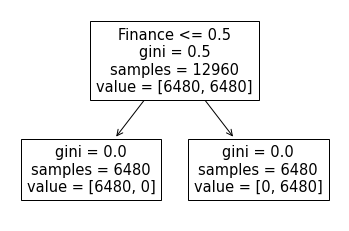

In [91]:
tree.plot_tree(dtree, feature_names=features)